<a href="https://colab.research.google.com/github/AniketJoshi111/STC-repo/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_stc.csv to preprocessed_stc.csv


In [3]:
data = pd.read_csv('preprocessed_stc.csv')
print(data.head())


  Previous_Grades  Attendance Class_Participation  Study_Hours  \
0               A          81              Medium          8.0   
1               C          93              Medium         12.0   
2               A          86                 Low         15.0   
3               A          84                 Low         13.0   
4               C          73                High         10.0   

  Financial_Status School_Environment Professor_Quality  Screen_Time Tutoring  \
0              Low           Negative            Medium          3.0      Yes   
1              Low           Positive            Medium          7.0       No   
2           Medium           Positive              High          9.0      Yes   
3             High           Positive              High          5.0       No   
4              Low           Positive              High          2.0       No   

  Lack_of_Interest  Time_Wasted_on_Social_Media Grades  
0              Low                            2      B  
1 

In [4]:
print(data.isnull().sum())


Previous_Grades                1
Attendance                     0
Class_Participation            0
Study_Hours                    1
Financial_Status               0
School_Environment             0
Professor_Quality              0
Screen_Time                    2
Tutoring                       2
Lack_of_Interest               0
Time_Wasted_on_Social_Media    0
Grades                         3
dtype: int64


In [5]:
data = data.dropna(subset=['Previous_Grades', 'Study_Hours', 'Screen_Time', 'Tutoring', 'Grades'])


In [12]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Grades')
#removed grades becoz it will be used for testing


In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Grades')


In [48]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [49]:
X = data.drop('Grades', axis=1)
y = data['Grades']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [108]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf',probability=True)

#training base models





Random Forest Train Accuracy: 1.0
SVM Train Accuracy: 0.5675675675675675
[['C' 'C']
 ['A' 'A']
 ['C' 'C']
 ['A' 'C']
 ['B' 'B']]
[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]


In [115]:
best_rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

rf_pred_train = best_rf_model.predict(X_train)
svm_pred_train = svm_model.predict(X_train)

print("Random Forest Train Accuracy:", accuracy_score(y_train, rf_pred_train))
print("SVM Train Accuracy:", accuracy_score(y_train, svm_pred_train))


stacked_train_features = np.column_stack((rf_pred_train, svm_pred_train))

enc = OneHotEncoder(handle_unknown='ignore')
stacked_train_features_encoded = enc.fit_transform(stacked_train_features).toarray()



# Generate probability predictions from base models
print('Stack consisting  of pred from RFC and SVC')
print(stacked_train_features[:5])


print("Encoded stack values for model_pred")
print(stacked_train_features_encoded[:5])

Random Forest Train Accuracy: 0.994067237969677
SVM Train Accuracy: 0.5675675675675675
Stack consisting  of pred from RFC and SVC
[['C' 'C']
 ['A' 'A']
 ['C' 'C']
 ['A' 'C']
 ['B' 'B']]
Encoded stack values for model_pred
[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]


In [111]:
meta_model = LogisticRegression()
meta_model.fit(stacked_train_features_encoded, y_train)

LogisticRegression()

In [112]:
rf_pred_test = rf_model.predict(X_test)
svm_pred_test = svm_model.predict(X_test)
stacked_test_features = np.column_stack((rf_pred_test, svm_pred_test))
stacked_test_features_encoded = enc.transform(stacked_test_features).toarray()
final_predictions = meta_model.predict(stacked_test_features_encoded)
print("Final Accuracy:", accuracy_score(y_test, final_predictions))

Final Accuracy: 0.33421226104152935


<Axes: >

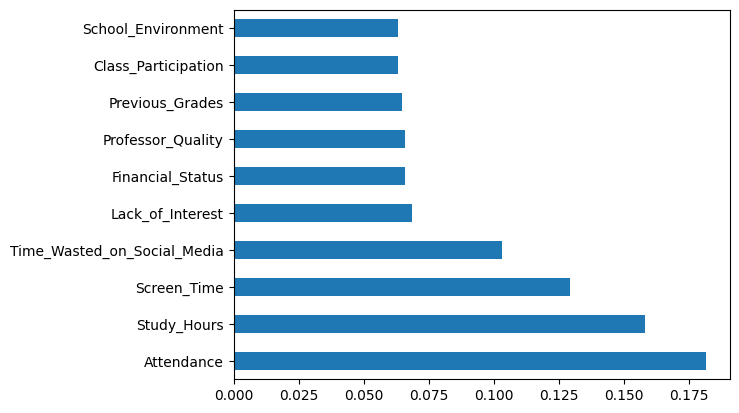

In [26]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')



In [27]:
# Remove the mean_squared_error and r2_score calculation as they are not appropriate for classification problems
# Predictions
y_pred = model.predict(X_test)


# Print the results you have already calculated in the previous code block
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.3197099538562953
